# 8/18

#### 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression 이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [3]:
ndf['horsepower'] = ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


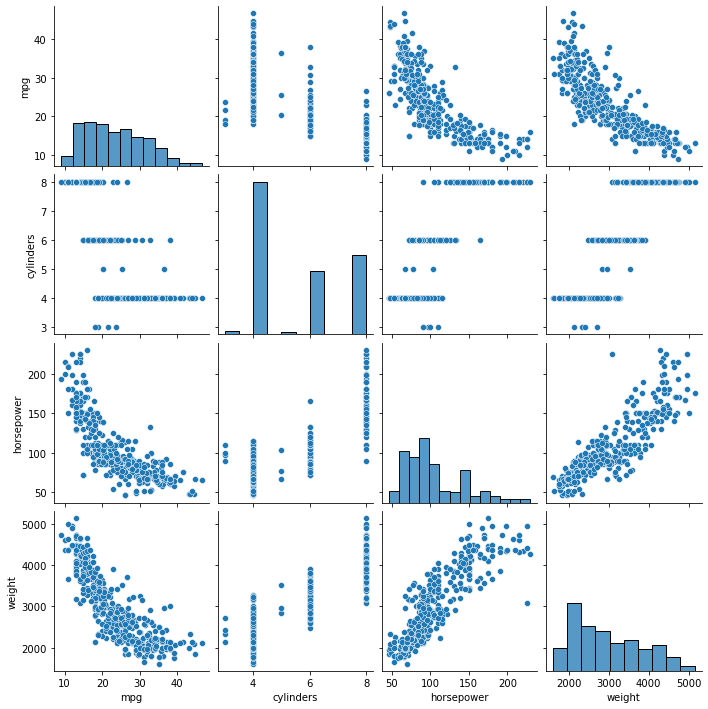

In [4]:
sns.pairplot(ndf)

In [5]:
### 단순선형회귀모델만들기
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수 / 데이터프레임으로 뽑기
y = ndf['mpg'] # 종속변수 / 시리즈로 뽑기

### 학습용 / 검증용 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=11) # test_size=0.3 : 검증용사이즈 30%

In [6]:
# 선형회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # 훈령용 독립변수, 훈령용 종속변수 줘서 학습시키기
                        # 최소제곱법을 이용해서 회귀식을 만듦
y_preds = lr.predict(X_test) # 예측값
y_preds[:5]

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907])

### 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것(잘안씀)
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds) # mse : 오차
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse, rmse, r2))

### 설명력 약 64%
### mpg의 단위에 따라 수치의 크기가 달라지면 mse, rmse의 크기도 달라질 수 있음. (상대적임. 절대적인 의미 X)

MSE:22.169, RMSE:4.708, R2 score:0.641


In [8]:
# 회귀식(lr)의 기울기 구하기
print('기울기 a :',lr.coef_)
print('절편 b :', lr.intercept_)

기울기 a : [-0.00762163]
절편 b : 45.971217704757684


<AxesSubplot:ylabel='Frequency'>

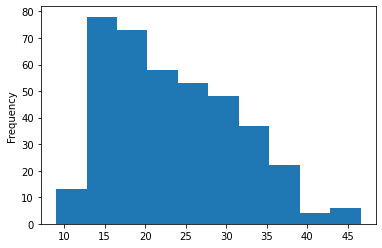

In [9]:
y.plot(kind='hist')
### 정규분포가 아님

<AxesSubplot:ylabel='Frequency'>

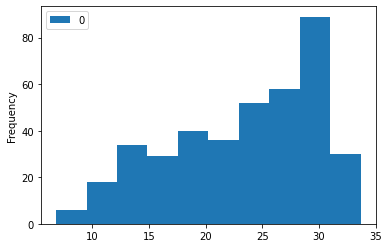

In [10]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

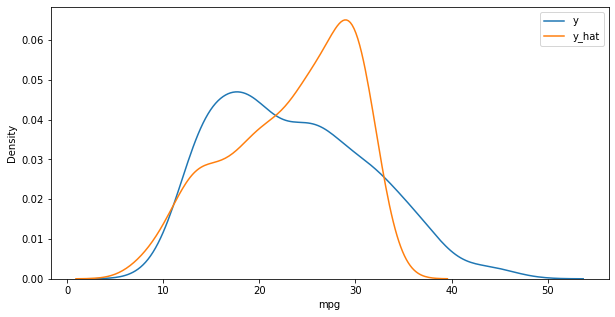

In [11]:
# 한군데에 같이 그리기
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.legend()

## 차이가 큼 

### 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
- 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [13]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수 / 데이터프레임으로 뽑기
y = ndf['mpg'] # 종속변수 / 시리즈로 뽑기

### 학습용 / 검증용 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=11) # test_size=0.3 : 검증용사이즈 30%

In [14]:
# 싸이킷런에서 다항식으로 변환해주는 함수 지원
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환
poly = PolynomialFeatures(degree=2) # 객체 만들기 / degree에 원하는 차수 넣기. degree=2 -> 2차항 적용
X_train_poly = poly.fit_transform(X_train) # 1차항인 X_train 데이터를 2차항으로 변환

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [15]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train) # 학습시키기

X_test_poly = poly.fit_transform(X_test) # X_test도 2차항으로 변환
# 결정계수 구하는 다른 방법. score함수 사용
r_square = pr.score(X_test_poly, y_test)
r_square

0.6368479947378759

In [16]:
### 결정계수 구하는 두 가지 방법! (인자 넣는게 다름)

# r2_score() 사용
from sklearn.metrics import mean_squared_error, r2_score
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly = pr.predict(X_test_poly)
r_square = r2_score(y_test, y_preds_poly)
print(r_square)

# score 사용
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.6368479947378759
0.6368479947378759


Text(0, 0.5, 'mpg')

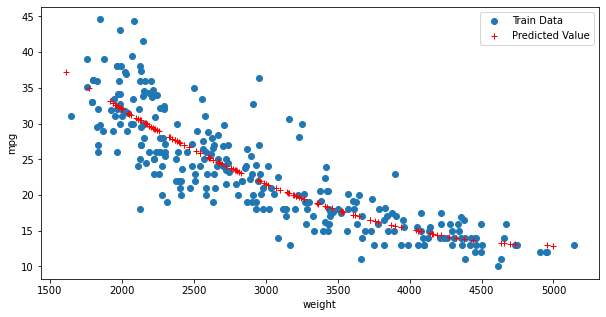

In [17]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

## 회귀선을 곡선의 형태로 그려줌

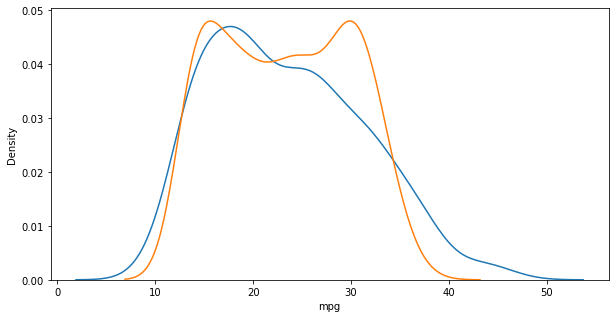

In [18]:
X_poly = poly.fit_transform(X) # X를 2차항으로 바꿔줌
y_hat = pr.predict(X_poly) # 2차항으로 바꾼 X를 예측한 값

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

## 단항회귀로 했을 때에 비교하여 다항회귀는 두 그래프의 차이가 줄었음! 더 적합

### 다중 회귀분석
- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [19]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [20]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)
lr = LinearRegression() # 단항/다항 모두 LinearRegression사용
lr.fit(X_train,y_train) # 학습
y_preds = lr.predict(X_test) # 예측
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse, rmse, r2))

MSE:19.674, RMSE:4.436, R2 score:0.680


In [21]:
# 회귀식 기울기
print('X변수의 계수 :',lr.coef_) # 변수가 3개이므로 3개가 나옴
print('상수항 :',lr.intercept_)

X변수의 계수 : [-0.57598375 -0.03393439 -0.00537578]
상수항 : 45.99088694107767


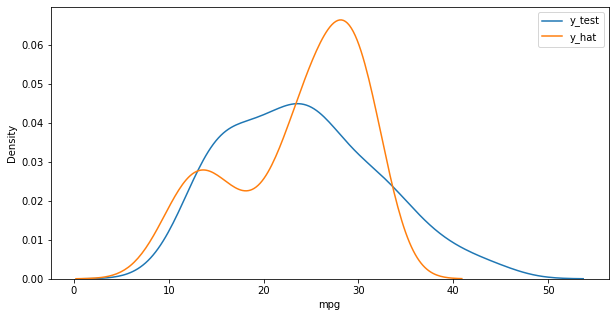

In [22]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.legend()

In [23]:
ndf # 단위가 다 다름. 변수별로 값의 크기 차이가 큼 -> 스케일링 해주기

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449
...,...,...,...,...
393,27.0,4,86.0,2790
394,44.0,4,52.0,2130
395,32.0,4,84.0,2295
396,28.0,4,79.0,2625


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 0 ~ 1 사이로 바꿔줌

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [25]:
X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2_1 = r2_score(y_test, y_preds) # r2 구하는 방법1
r2_2 = lr.score(X_test, y_test) # r2 구하는 방법2
print('R2 : ',r2_1, r2_2)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
# print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')

R2 :  0.6801824662240046 0.6801824662240046
MSE : 0.014, RMSE : 0.118


<AxesSubplot:xlabel='mpg', ylabel='Density'>

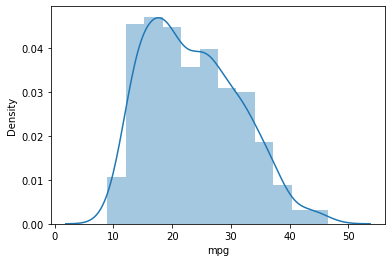

In [26]:
sns.distplot(ndf.mpg)

<AxesSubplot:title={'center':'Standard Transformed mpg Histogram'}, ylabel='Density'>

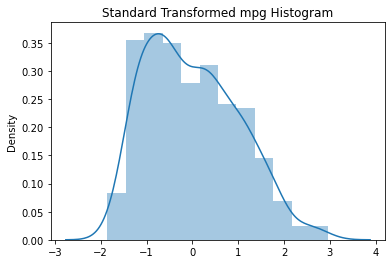

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(data=scaled_data)
plt.title('Standard Transformed mpg Histogram')
sns.distplot(scaled_data_df)

,mpg,cylinders,horsepower,weight
0,-0.698638,1.483947,0.664133,0.620540
1,-1.083498,1.483947,1.574594,0.843334
2,-0.698638,1.483947,1.184397,0.540382
3,-0.955212,1.483947,1.184397,0.536845
4,-0.826925,1.483947,0.924265,0.555706
...,...,...,...,...
387,0.455941,-0.864014,-0.480448,-0.221125
388,2.636813,-0.864014,-1.364896,-0.999134
389,1.097374,-0.864014,-0.532474,-0.804632
390,0.584228,-0.864014,-0.662540,-0.415627


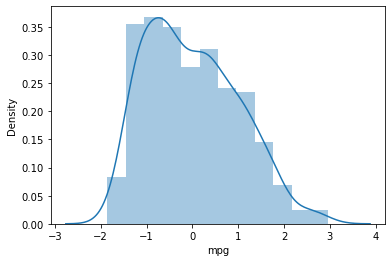

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf_st = scaler.fit_transform(ndf)
ndf_st_df = pd.DataFrame(ndf_st, columns = ndf.columns)
sns.distplot(ndf_st_df.mpg)

ndf_st_df

In [29]:
X = ndf_st_df[['cylinders','horsepower','weight']]
y = ndf_st_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r2_1 = r2_score(y_test, y_preds) # r2 구하는 방법1
r2_2 = lr.score(X_test, y_test) # r2 구하는 방법2
print('R2 : ',r2_1, r2_2)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
# print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')

### R2 은 동일하나, MSE, RMSE는 변수 값의 크기에 따라 변동하는 값이므로 바꼈음!

R2 :  0.6801824662240045 0.6801824662240045
MSE : 0.324, RMSE : 0.569


np.log로 하면 변환할 때 부작용이 있음  
따라서 np.log1p 사용 권장  

<AxesSubplot:xlabel='mpg', ylabel='Density'>

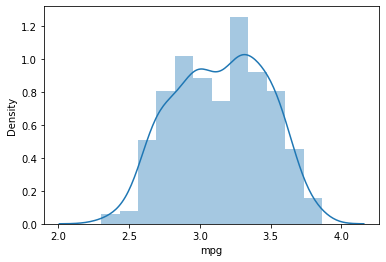

In [30]:
# 로그변환
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

# 8/19

[-0.09398496  1.97368421 -1.73684211]
          2
-0.09398 x + 1.974 x - 1.737


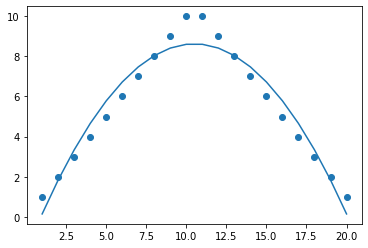

In [43]:
# 참고

import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = [1,2,3,4,5,6,7,8,9,10,10,9,8,7,6,5,4,3,2,1]

curve = np.polyfit(x,y,2) # polyfit : 2차원으로 바꿔줌
poly = np.poly1d(curve)
print(curve)
print(poly)
new_x = []
new_y = []
for i in range(20):
    new_x.append(i+1)
    calc = poly(i+1)
    new_y.append(calc)
    
plt.scatter(x,y)
plt.plot(new_x,new_y)
# 직선 -> 곡선으로 바꿔줌